**K-means clustering:**
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. ... Data points are clustered based on feature similarity

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Python programming/Dataset_kaggle/kaggle_dataset/Mall_Customers.csv')

In [ ]:
df=df.rename(columns={'Gender':'gender','CustomerID':'id','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,id,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


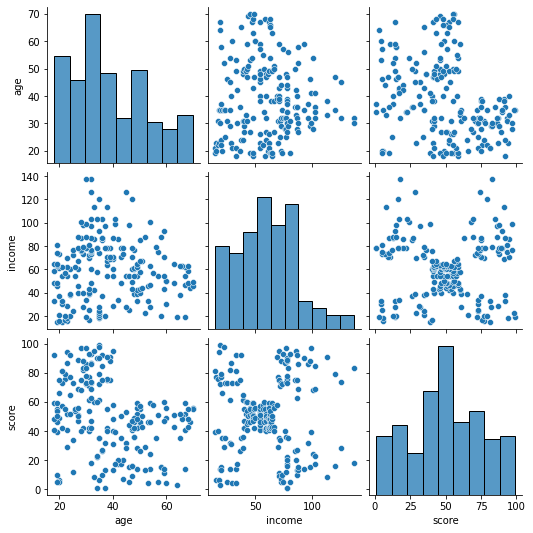

In [ ]:
# now plot for each column
seaborn.pairplot(df[['age','income','score']])

In [ ]:
import sklearn.cluster as cluster

In [ ]:
kmeans=cluster.KMeans(n_clusters=5)

In [ ]:
kmeans=kmeans.fit(df[['income','score']])

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [ ]:
df['income_cluster']=kmeans.labels_

In [ ]:
df['income_cluster'].value_counts()

0    81
1    39
2    35
3    23
4    22
Name: income_cluster, dtype: int64

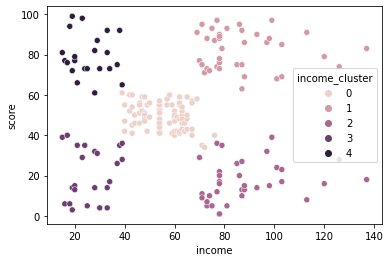

In [ ]:
# now cluster in scatter plot
seaborn.scatterplot(x='income',y='score',hue='income_cluster',data=df)

In [ ]:
# now plot for age and score column
kmeans=cluster.KMeans(n_clusters=2)

In [ ]:
kmeans.fit(df[['age','score']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [ ]:
df['age_cluster']=kmeans.labels_

In [ ]:
df['age_cluster'].value_counts()

0    115
1     85
Name: age_cluster, dtype: int64

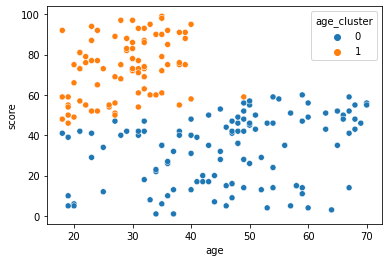

In [ ]:
# now cluster in scatter plot
seaborn.scatterplot(x='age',y='score',hue='age_cluster',data=df)

In [ ]:
# now elbow method in kmeans cluster
from sklearn.cluster import KMeans
k_range=range(1,12)
wcss=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['income','score']])
  wcss.append(km.inertia_)


In [ ]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 31632.25980947347,
 24990.4343103969,
 21794.8856090982,
 19657.783608703958,
 18135.274558022622]

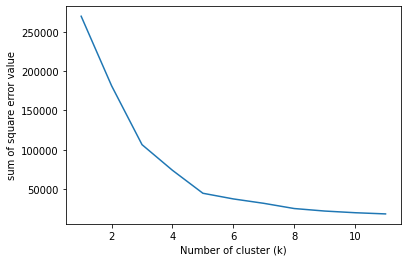

In [ ]:
plt.xlabel('Number of cluster (k)')
plt.ylabel('sum of square error value')
plt.plot(k_range,wcss)